In [129]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
%matplotlib inline

Сделать новый файл с матчами

In [130]:
all_matches = pd.read_json("storage/results.json" )
all_matches["score_h"] = all_matches["score"].apply( lambda x: int (x.split(":")[0] )  ) 
all_matches["score_a"] = all_matches["score"].apply( lambda x: int (x.split(":")[1] )  ) 
all_matches["total_sum"] = all_matches["score_h"] + all_matches["score_a"]
del all_matches["score"]
del all_matches["id"]
del all_matches["quarters"]
del all_matches["gandicap"]

In [124]:
total = all_matches.copy()
total["delta"] = total["total_sum"] - total["total"]
del total["date"]
total = total.reset_index(drop=True)
total.tail()

KeyError: 'total'

In [125]:
import matplotlib as mpl
import matplotlib.lines as mlines

def get_team( team_name ) :    
    home = total[total["home"] == team_name][["odd_h", "total", "delta" ]]
    home = home.rename(columns={"odd_h": "odd", "match_score" : "match"})

    away =  total[total["away"] == team_name][["odd_a", "total", "delta" ]]
    away = away.rename(columns={"odd_a": "odd", "match_score" : "match"})
    team = pd.concat([home,away]).reset_index(drop=True)
    return team

def get_fav( val ):
    if val >= 1.0 and val < 1.5 :
        return "HIGH"
    elif val >= 1.5 and val < 2.0 :
        return "MED"
    elif val >= 2.0 and val < 3.0 :
        return "LOW"
    elif val >= 3.0  :
        return "FEW"
    
def complete_match(home, away, total):
    team = get_team(home)
    team["fav"] = team["odd"].apply( lambda x : get_fav(x) )
    team['id'] = "home"    
    team2 = get_team(away)
    team2["fav"] = team2["odd"].apply( lambda x : get_fav(x) )
    team2['id'] = "away"
    # data=pd.concat([team, team2])
    
    ax = team.plot.scatter(x="total", y="delta", label=home,  c='odd', colormap='cool')
    ax1 = team2.plot.scatter(x="total", y="delta", label=away, c='odd', colormap='cool')
        
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    x_min1, x_max1 = ax1.get_xlim()   
    y_min1, y_max1 = ax1.get_ylim()

    ax.plot([float(total), float(total), float(total)], [y_min, 0, y_max], 'y', ls='--')
    ax.plot([x_min,x_max],[0, 0], 'y', ls='--')
    ax1.plot([float(total), float(total), float(total)], [y_min1, 0, y_max1], 'y', ls='--')
    ax1.plot([x_min1,x_max1],[0, 0], 'y', ls='--')    
    

For Лос-Анджелес Клипперс and Майами Хит with total 218.5 and odds: 1.66 :  2.24


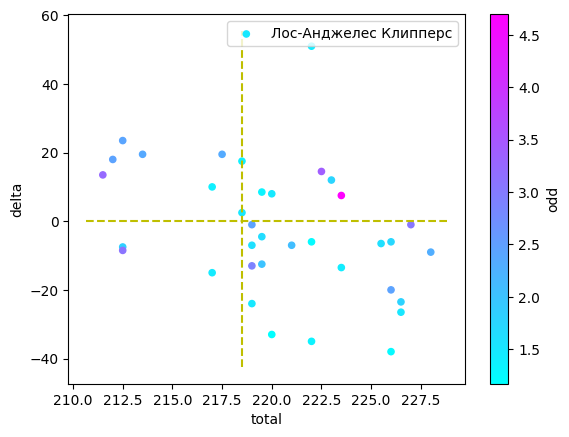

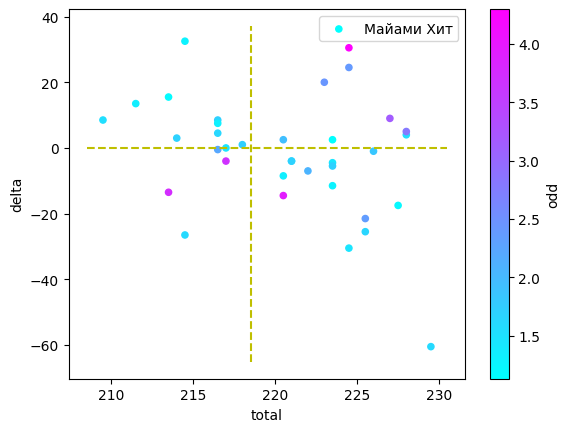

In [126]:
import datetime, json
import pandas as pd

today = pd.read_json("storage/today.json" )
del today["id"]
del today["gandicap"]

m = today.iloc[10]
print( f"For {m['home']} and {m['away']} with total {m['total']} and odds: {m['odd_h']} :  {m['odd_a']}")
complete_match( m['home'], m['away'], m['total'] )
    

In [127]:
team_info = all_matches.copy()
team_info["delta"] = team_info["total_sum"] - team_info["total"]
team_info = team_info.reset_index(drop=True)
team_info.tail()

teams = sorted ( all_matches['home'].unique() )
teams[1]

'Бостон Селтикс'

In [128]:
team_name = teams[1]
team_stat = team_info[ (team_info['home'] == team_name) | (team_info['away'] == team_name )]
team_stat['date'] = team_stat['date'].apply( lambda x: x.date() )  
team_stat = team_stat.set_index('date')
team_stat.sort_values(by=['date'])
# team_stat.plot.scatter()

C:\Users\glaha\AppData\Local\Temp\ipykernel_928\1210257089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_stat['date'] = team_stat['date'].apply( lambda x: x.date() )


,home,away,odd_h,odd_a,total,score_h,score_a,total_sum,delta
date,,,,,,,,,
2022-01-12,Бостон Селтикс,Майами Хит,1.23,4.30,224.5,134,121,255,30.5
2022-03-11,Кливленд Кавальерс,Бостон Селтикс,2.01,1.81,220.5,114,113,227,6.5
2022-03-12,Бостон Селтикс,Майами Хит,1.37,3.15,227.0,116,120,236,9.0
2022-05-11,Бостон Селтикс,Чикаго Буллз,1.34,3.30,223.5,123,119,242,18.5
2022-05-12,Бруклин Нетс,Бостон Селтикс,2.08,1.75,231.0,92,103,195,-36.0
2022-06-11,Нью-Йорк Никс,Бостон Селтикс,2.43,1.56,226.5,118,133,251,24.5
2022-06-12,Торонто Рэпторс,Бостон Селтикс,1.82,2.00,228.5,110,116,226,-2.5
2022-08-11,Мемфис Гриззлис,Бостон Селтикс,2.34,1.60,232.5,106,109,215,-17.5
2022-08-12,Финикс Санс,Бостон Селтикс,1.78,2.05,230.5,98,125,223,-7.5
